In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

#1 => Reatail Dataset

In [3]:
df = pd.read_csv("/content/sample_data/Retail(Dataset).csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.shape

(9994, 13)

In [6]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df.isnull().sum()

,0
Ship Mode,0
Segment,0
Country,0
City,0
State,0
Postal Code,0
Region,0
Category,0
Sub-Category,0
Sales,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [9]:
df.duplicated().sum()

np.int64(17)

In [10]:
df.nunique()

,0
Ship Mode,4
Segment,3
Country,1
City,531
State,49
Postal Code,631
Region,4
Category,3
Sub-Category,17
Sales,5825


In [11]:
df['Postal Code'] = df['Postal Code'].astype('object')

In [13]:
df.drop_duplicates(subset = None ,keep = 'first' ,inplace = True)
df.duplicated().sum()

np.int64(0)

<Axes: >

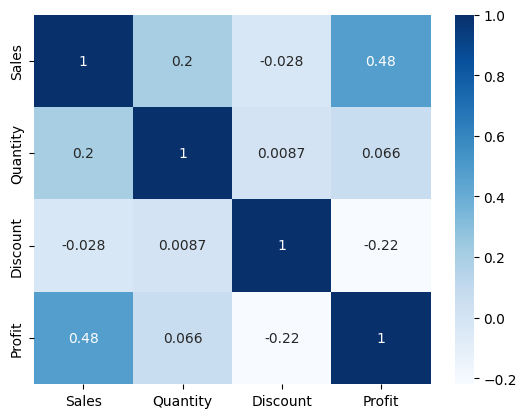

In [19]:
corr = df.select_dtypes(include = ['number']).corr()
sns.heatmap(corr ,annot = True ,cmap = 'Blues')

In [20]:
df = df.drop(['Postal Code'],axis = 1)

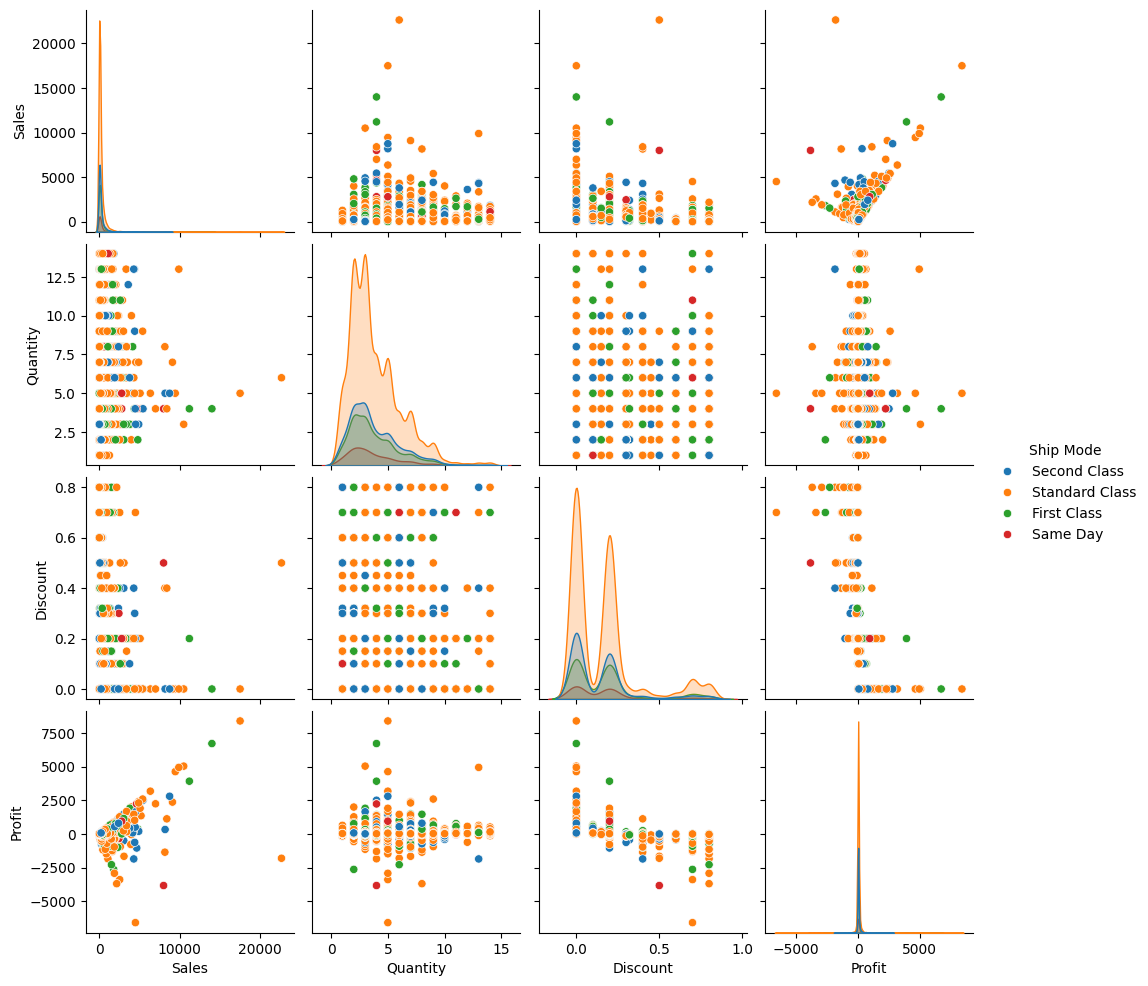

In [21]:
sns.pairplot(df ,hue = 'Ship Mode')

In [22]:
df['Ship Mode'].value_counts()

,count
Ship Mode,
Standard Class,5955
Second Class,1943
First Class,1537
Same Day,542


<Axes: xlabel='Ship Mode', ylabel='count'>

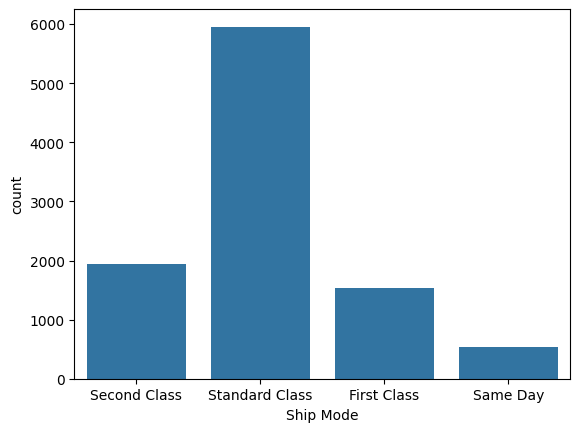

In [24]:
sns.countplot(x = df['Ship Mode'])

In [25]:
df['Segment'].value_counts()

,count
Segment,
Consumer,5183
Corporate,3015
Home Office,1779


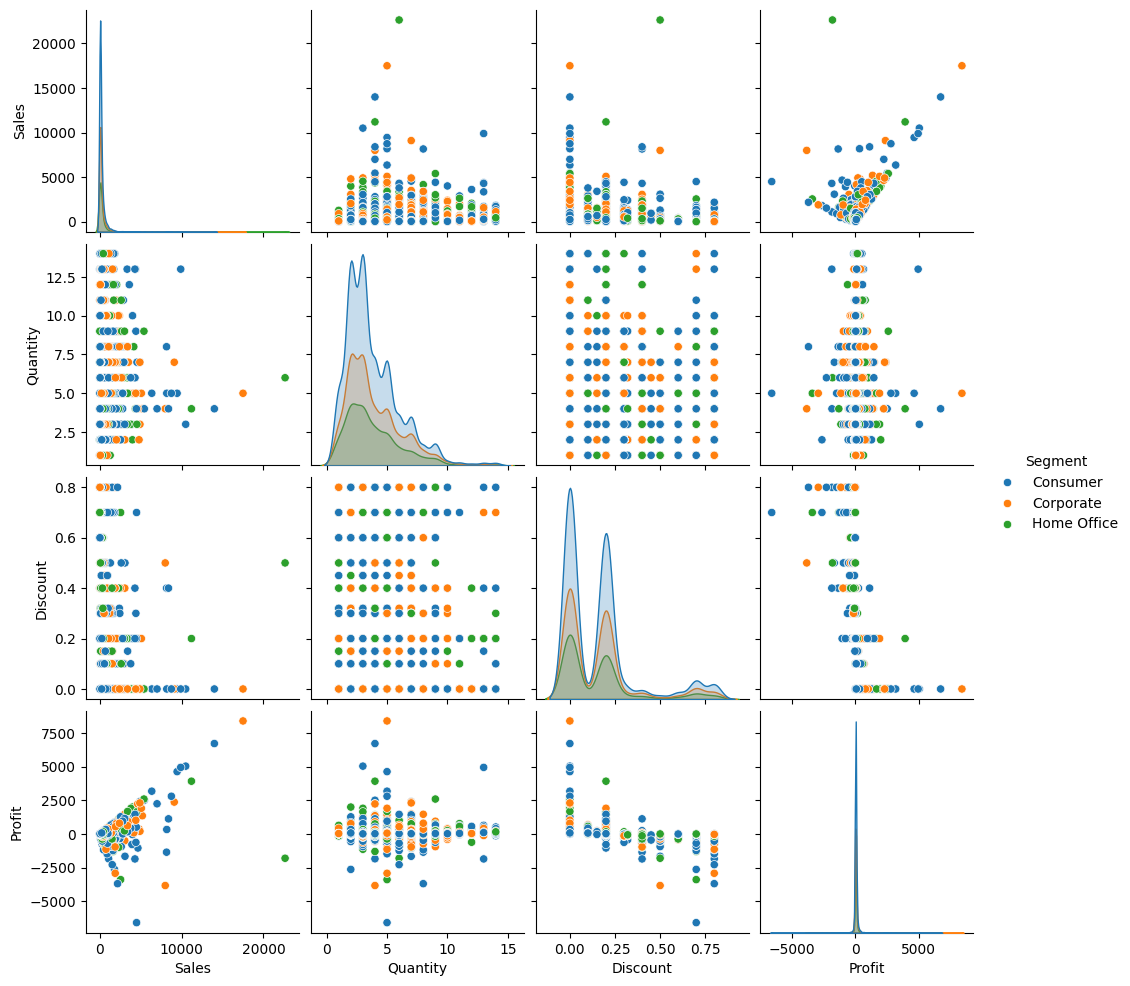

In [26]:
sns.pairplot(df,hue = 'Segment')

In [27]:
df['Category'].value_counts()

,count
Category,
Office Supplies,6012
Furniture,2118
Technology,1847


<Axes: xlabel='Category', ylabel='count'>

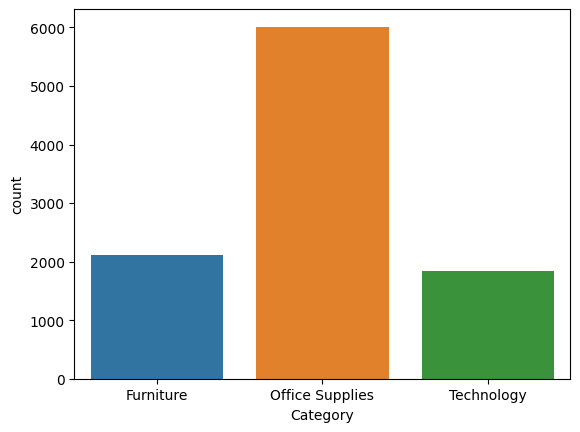

In [28]:
sns.countplot(x='Category',data=df,palette='tab10')

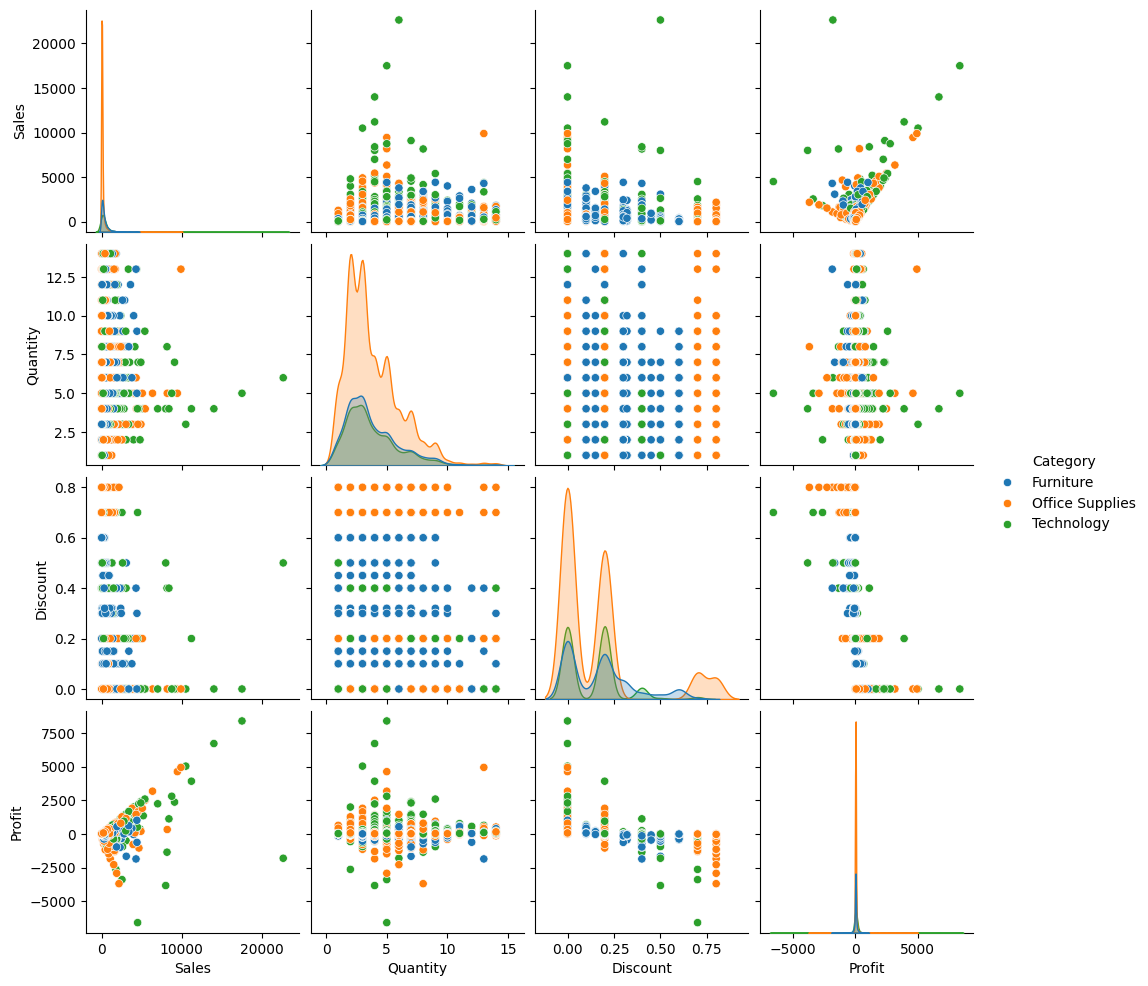

In [29]:
sns.pairplot(df,hue='Category')

In [30]:
df['Sub-Category'].value_counts()

,count
Sub-Category,
Binders,1522
Paper,1359
Furnishings,956
Phones,889
Storage,846
Art,795
Accessories,775
Chairs,615
Appliances,466


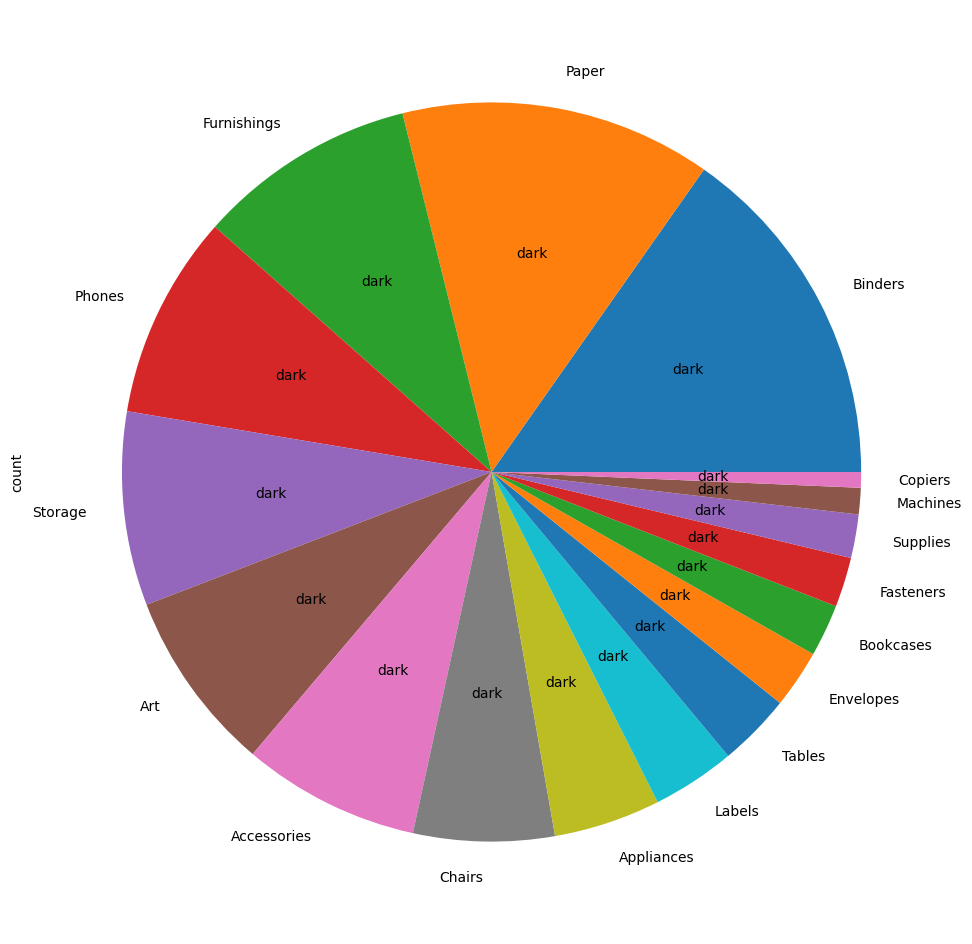

In [31]:
plt.figure(figsize=(15,12))
df['Sub-Category'].value_counts().plot.pie(autopct='dark')
plt.show()

Observation 1

Maximum are from Binders, Paper, furnishings, Phones, storage, art, accessories and minimum from copiers, machines, suppliers


In [32]:
df['State'].value_counts()

,count
State,
California,1996
New York,1127
Texas,983
Pennsylvania,586
Washington,502
Illinois,491
Ohio,468
Florida,383
Michigan,254


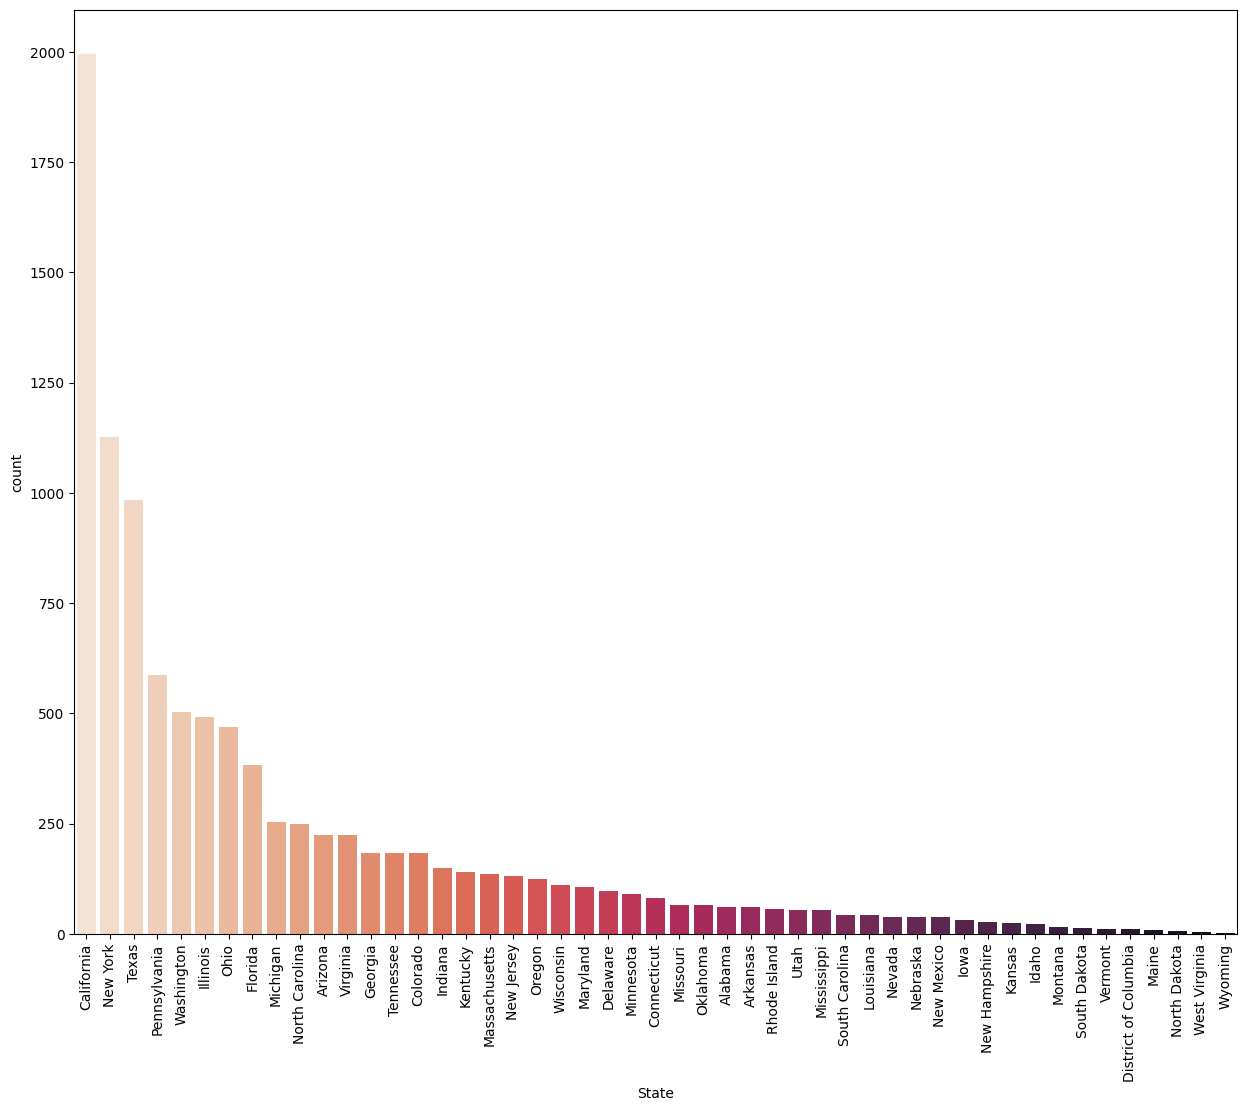

In [33]:
plt.figure(figsize=(15,12))
sns.countplot(x='State',data=df,palette='rocket_r',order=df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

Observation 2

Highest number of buyers are from California and New York

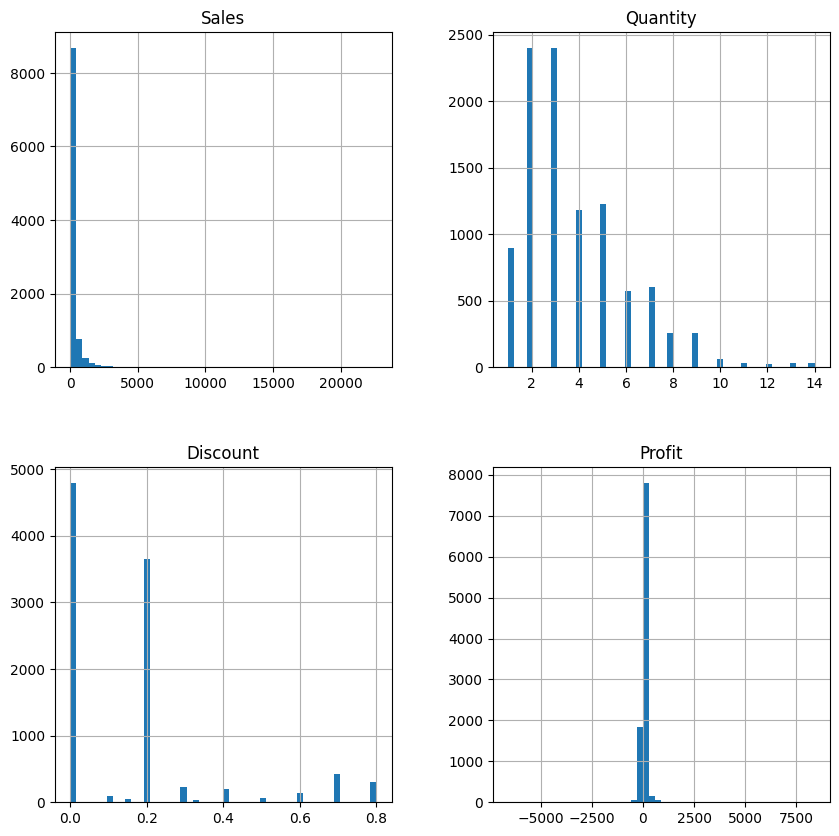

In [34]:
df.hist(figsize=(10,10),bins=50)
plt.show()


Observation 3

Most customers tends to buy quantity of 2 and 3
Discount give maximum is 0 to 20 percent

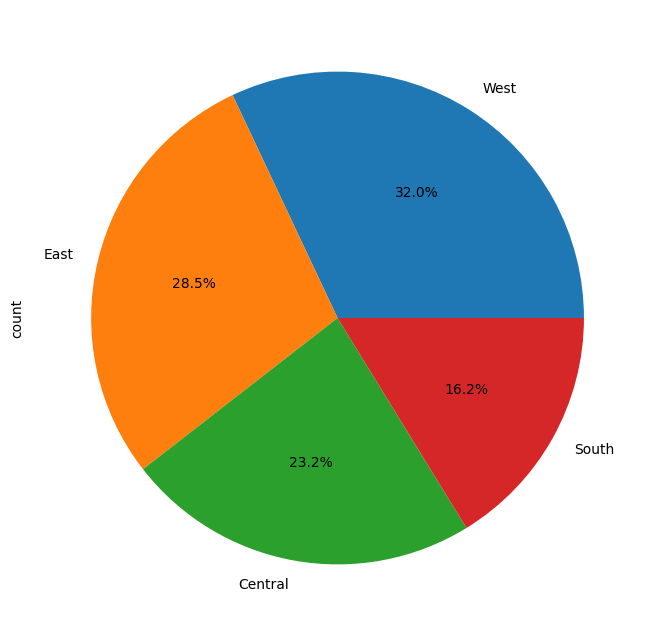

In [35]:
plt.figure(figsize=(10,8))
df['Region'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()

PRofit vs Discount

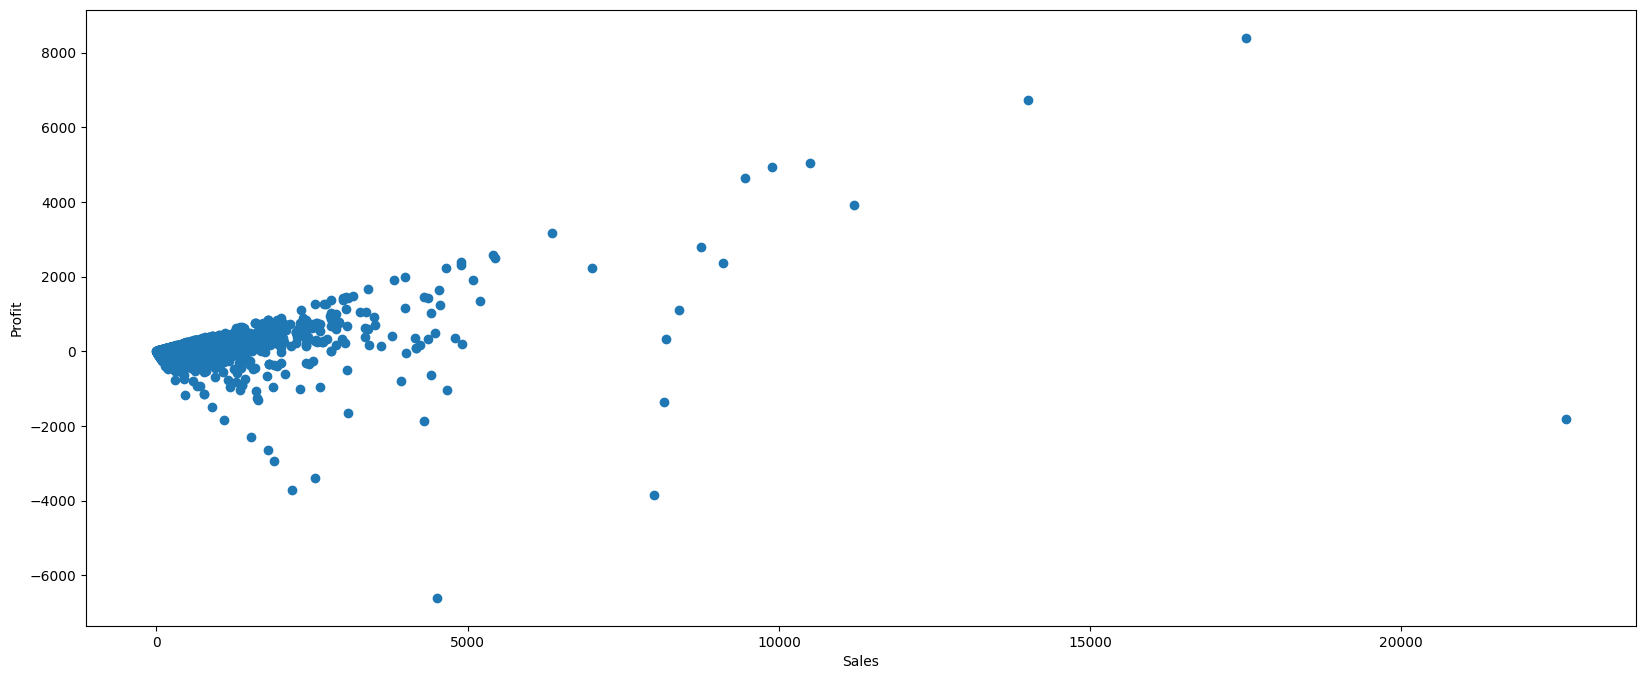

In [37]:
fig,ax=plt.subplots(figsize=(20,8))
ax.scatter(df['Sales'],df['Profit'])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()

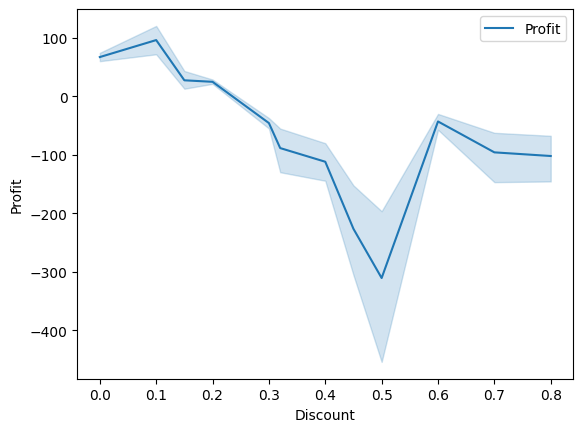

In [38]:
sns.lineplot(x='Discount',y='Profit',label='Profit',data=df)
plt.legend()
plt.show()

Observation 4

No correlation between profit and discount

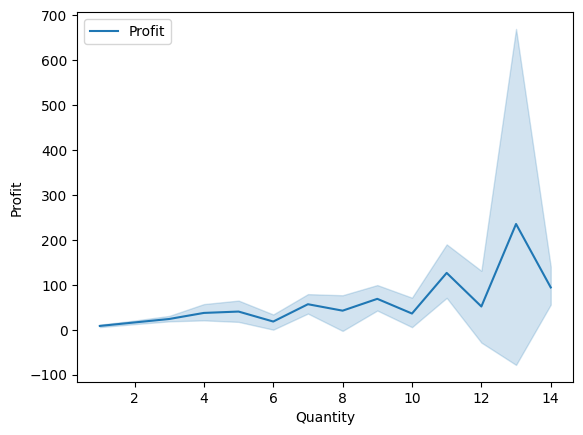

In [39]:
sns.lineplot(x='Quantity',y='Profit',label='Profit',data=df)
plt.legend()
plt.show()

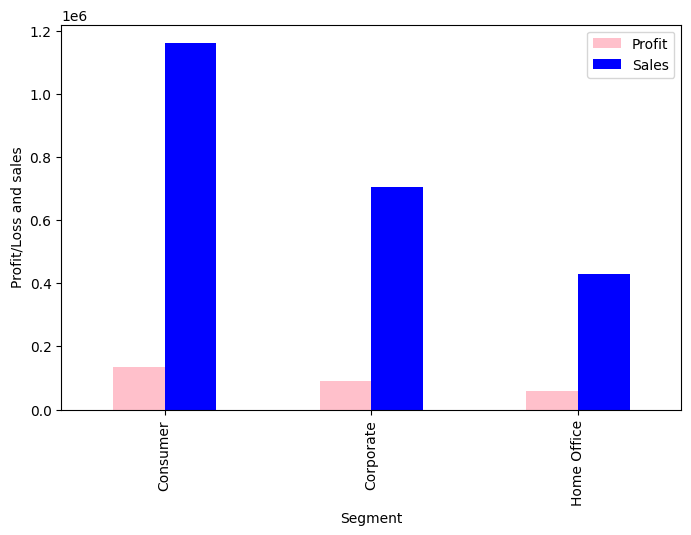

In [40]:
df.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=['pink','blue'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

Observation 5

Profit and sales are maximum in consumer segment and minimum in Home Office segmet

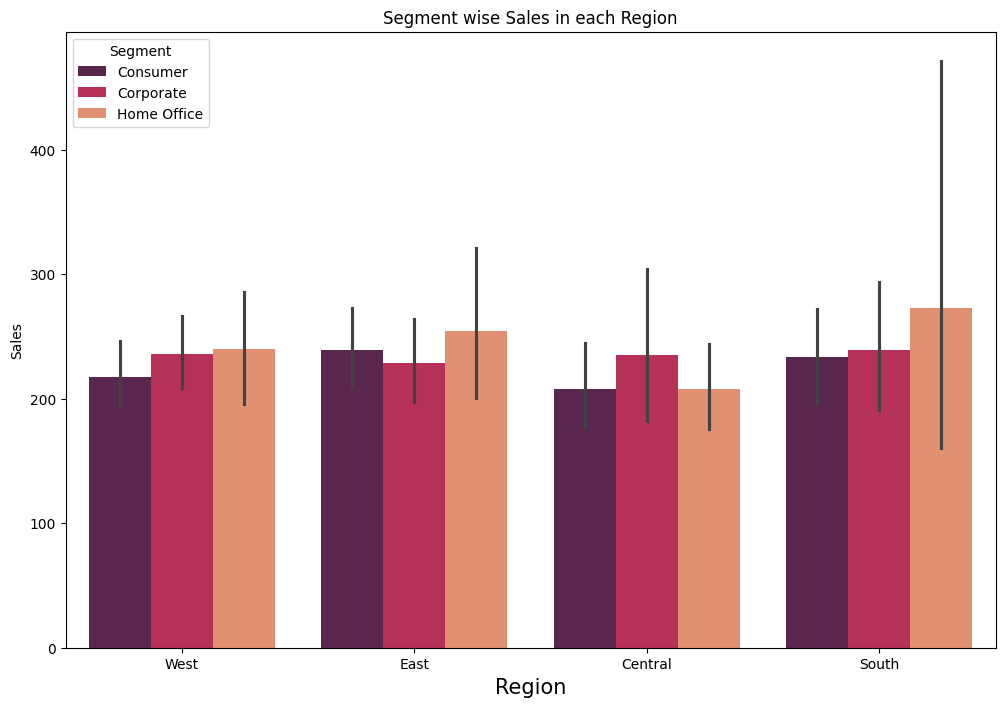

In [41]:
plt.figure(figsize=(12,8))
plt.title('Segment wise Sales in each Region')
sns.barplot(x='Region',y='Sales',data=df,hue='Segment',order=df['Region'].value_counts().index,palette='rocket')
plt.xlabel('Region',fontsize=15)
plt.show()

Observation 6

Segment wise sales are almost same in every region

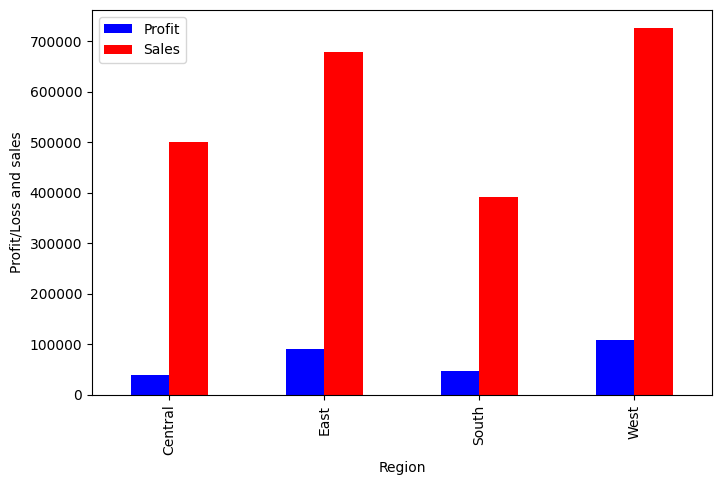

In [42]:
df.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['blue','red'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()